In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001 or 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

# filter out parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
153,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999.0,5.50,99999.0,2.00,additive,no,NaN,0,0.0
154,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000.0,5.33,99999.0,2.00,additive,no,NaN,0,0.0
155,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000.0,5.01,99999.0,3.00,additive,yes,NaN,0,0.0
156,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0
157,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022.0,5.29,99999.0,2.00,additive,no,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...","Biswas, Raman, Saurabh",2020.0,8.00,3.0,99999.00,multiplicative,no,NaN,0,0.0
767,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021.0,4.00,3.0,5.99,multiplicative-additive,yes,NaN,0,0.0
913,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008.0,5.50,2.0,99999.00,multiplicative,yes,FPTAS,0,0.0
912,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0


In [6]:
# read sheet1
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Exact Problem Statement?'
]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
sheet1 = sheet1[sheet1['Looked at?'] != 0]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]
sheet1 = sheet1[sheet1['Exact Problem Statement?'] != '0']
sheet1 = sheet1[sheet1['Exact Problem Statement?'] != 0]

excluded_families = ['Self-Balancing Trees Creation', 'Self-Balancing Trees Insertion', 'Self-Balancing Trees Deletion', 'Self-Balancing Trees Search', 'Mutual Exclusion']
for family in excluded_families:
    sheet1 = sheet1[sheet1['Family Name'] != family]
# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# drop if Famiy Name is not in approximation_algorithms
# sheet1 = sheet1[sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]

sheet1



,Family Name,Looked at?,Variation,Exact Problem Statement?,Algorithm Name,Year,Time Complexity Class,Approximate?,Parallel?,Quantum?
2,Optimal Binary Search Trees,2.0,Alphabetic Tree Problem,1.0,Klawe; Mumey,1993.0,3.0,0,0,0.0
8,The Subset-Sum Problem,2.0,Subset Sum,1.0,Pisinger,2003.0,3.0,0,0,0.0
9,The Subset-Sum Problem,2.0,Subset Sum,1.0,Faaland,1973.0,3.0,0,0,0.0
10,The Subset-Sum Problem,2.0,Subset Sum,1.0,Pferschy,1999.0,3.0,0,0,0.0
11,The Subset-Sum Problem,2.0,Subset Sum,1.0,Klinz,1999.0,4.5,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1040,Recovery,2.0,"Steal, No-Force",1.0,ARIES,1992.0,3.0,0,0,0.0
1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


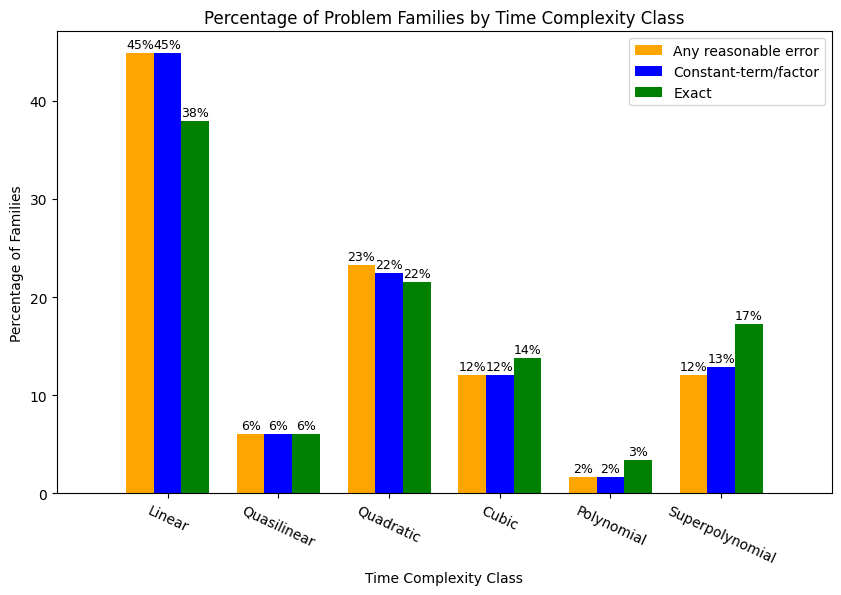

In [11]:
import math
df = pd.concat([approximation_algorithms, sheet1], axis=0)


# print paralel values

# create column exact that is True if the algorithm have no Approximation Type
df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

# create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
# sort by year and time complexity
df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)



# split the data in exact, constant factor and approximate
exact = df[df['Exact'] == True]
constant_factor = df[df['Constant Factor'] | df['Exact']]
# approximate = constant factor = False
approximate = df


# min time complexity class for each family
min_exact = exact.groupby('Family Name')['Time Complexity Class'].min()
min_constant_factor = constant_factor.groupby('Family Name')['Time Complexity Class'].min()
min_approximate = approximate.groupby('Family Name')['Time Complexity Class'].min()

# round number
min_exact = min_exact.dropna().map(lambda x:  math.ceil(x))
min_constant_factor = min_constant_factor.dropna().map(lambda x:  math.ceil(x))
min_approximate = min_approximate.dropna().map(lambda x:  math.ceil(x))

# count how many families have each time complexity class
count_exact = min_exact.value_counts()
count_constant_factor = min_constant_factor.value_counts()
count_approximate = min_approximate.value_counts()





# fill missing time complexity classes with 0
for i in range(1, 9):
    if i not in count_exact:
        count_exact[i] = 0
    if i not in count_constant_factor:
        count_constant_factor[i] = 0
    if i not in count_approximate:
        count_approximate[i] = 0

# sort by index
count_exact = count_exact.sort_index()

#root computation
count_exact[3] = count_exact[3] + 1
#convex optimization
count_exact[7] = count_exact[7] + 1
#wiener
count_exact[8] = count_exact[8] + 1


count_constant_factor = count_constant_factor.sort_index()
count_approximate = count_approximate.sort_index()

# number of unique families in the df
n_families = df['Family Name'].nunique()


# plot as percentage
plt.figure(figsize=(10, 6))
# plot grouped bars
plt.bar(np.arange(1, 9, 1) - 0.25, count_approximate.values / n_families * 100, width=0.25, label='Any reasonable error', color='orange')
plt.bar(np.arange(1, 9, 1), count_constant_factor.values / n_families * 100, width=0.25, label='Constant-term/factor' , color='blue' )
plt.bar(np.arange(1, 9, 1) + 0.25, count_exact.values / n_families * 100, width=0.25, label='Exact', color='green')


plt.xticks(np.arange(3, 9, 1), [ 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial', 'Superpolynomial'])

# increase space between bars

plt.xlabel('Time Complexity Class')
plt.ylabel('Percentage of Families')

# Set the limits to fit the plot as the original
plt.xlim(2, 9)



# Add the percentage on top of each bar and fix the labels

for bar in plt.gca().patches:
    yval = bar.get_height()
    if yval > 0:
        
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, f'{yval:.0f}%', ha='center', fontsize=9)


plt.legend()

# rotate x labels
plt.xticks(rotation=-25)

plt.title('Percentage of Problem Families by Time Complexity Class')

plt.show()
